# Medical Appointment No Shows Capstone

## 3. EXPLORATORY DATA ANALYSIS

#####  Developing a deeper understanding of the model development data set and preparing to develop a solid model.

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'data/step2_output.csv'
df = pd.read_csv(path, index_col=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110517 entries, 0 to 110516
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110517 non-null  int64 
 1   AppointmentID   110517 non-null  int64 
 2   Gender          110517 non-null  object
 3   ScheduledDay    110517 non-null  object
 4   AppointmentDay  110517 non-null  object
 5   Age             110517 non-null  int64 
 6   Neighborhood    110517 non-null  object
 7   Scholarship     110517 non-null  int64 
 8   Hypertension    110517 non-null  int64 
 9   Diabetes        110517 non-null  int64 
 10  Alcoholism      110517 non-null  int64 
 11  Handicap        110517 non-null  int64 
 12  SMSSent         110517 non-null  int64 
 13  NoShow          110517 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [4]:
df.loc[0:1000:100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
100,166338799398515,5574764,F,2016-04-12 15:47:45+00:00,2016-04-29 00:00:00+00:00,20,BONFIM,0,0,0,0,0,1,No
200,733852941987295,5639942,M,2016-04-29 09:51:36+00:00,2016-04-29 00:00:00+00:00,70,CENTRO,0,1,0,0,0,0,No
300,4286766728467,5641489,F,2016-04-29 13:45:04+00:00,2016-04-29 00:00:00+00:00,32,ANDORINHAS,0,0,0,0,0,0,No
400,95216824697312,5627333,M,2016-04-27 09:22:00+00:00,2016-04-29 00:00:00+00:00,36,MARIA ORTIZ,0,0,0,0,0,0,No
500,3265242147884,5483275,F,2016-03-17 11:09:11+00:00,2016-04-29 00:00:00+00:00,12,ITARARÉ,0,0,0,0,0,0,Yes
600,2439784366822,5502075,F,2016-03-22 14:07:58+00:00,2016-04-29 00:00:00+00:00,60,DA PENHA,0,1,0,0,0,1,No
700,9241468689441,5639721,F,2016-04-29 09:27:20+00:00,2016-04-29 00:00:00+00:00,34,JESUS DE NAZARETH,0,0,0,0,0,0,No
800,5345442123637,5641453,M,2016-04-29 13:40:17+00:00,2016-04-29 00:00:00+00:00,16,JARDIM DA PENHA,0,0,0,0,0,0,No
900,6155253139385,5628618,F,2016-04-27 11:19:51+00:00,2016-04-29 00:00:00+00:00,27,MARIA ORTIZ,0,0,0,0,0,0,No


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110517.0,1.474886e+14,2.560841e+14,39217.0,4.172457e+12,3.172848e+13,9.438963e+13,9.999816e+14
AppointmentID,110517.0,5.675305e+06,7.129559e+04,5030230.0,5.640286e+06,5.680571e+06,5.725523e+06,5.790484e+06
Age,110517.0,3.708420e+01,2.310325e+01,0.0,1.800000e+01,3.700000e+01,5.500000e+01,1.000000e+02
Scholarship,110517.0,9.827447e-02,2.976868e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hypertension,110517.0,1.972547e-01,3.979280e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110517.0,7.187130e-02,2.582759e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110517.0,3.040256e-02,1.716931e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handicap,110517.0,2.221378e-02,1.614428e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMSSent,110517.0,3.210456e-01,4.668804e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


KeyError: 'time'

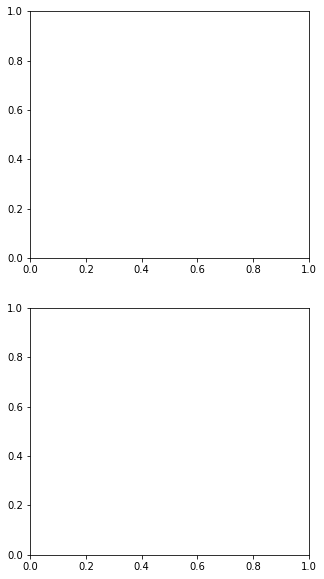

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
df.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
df.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show()

###  BUILD DATA PROFILES — PLOTS AND TABLES

<AxesSubplot:ylabel='Frequency'>

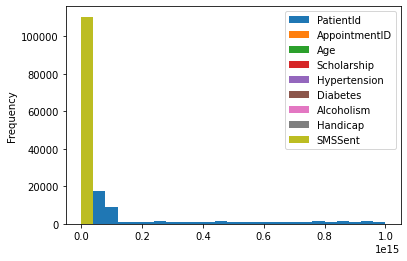

In [7]:
df.plot(kind='hist', bins=25)

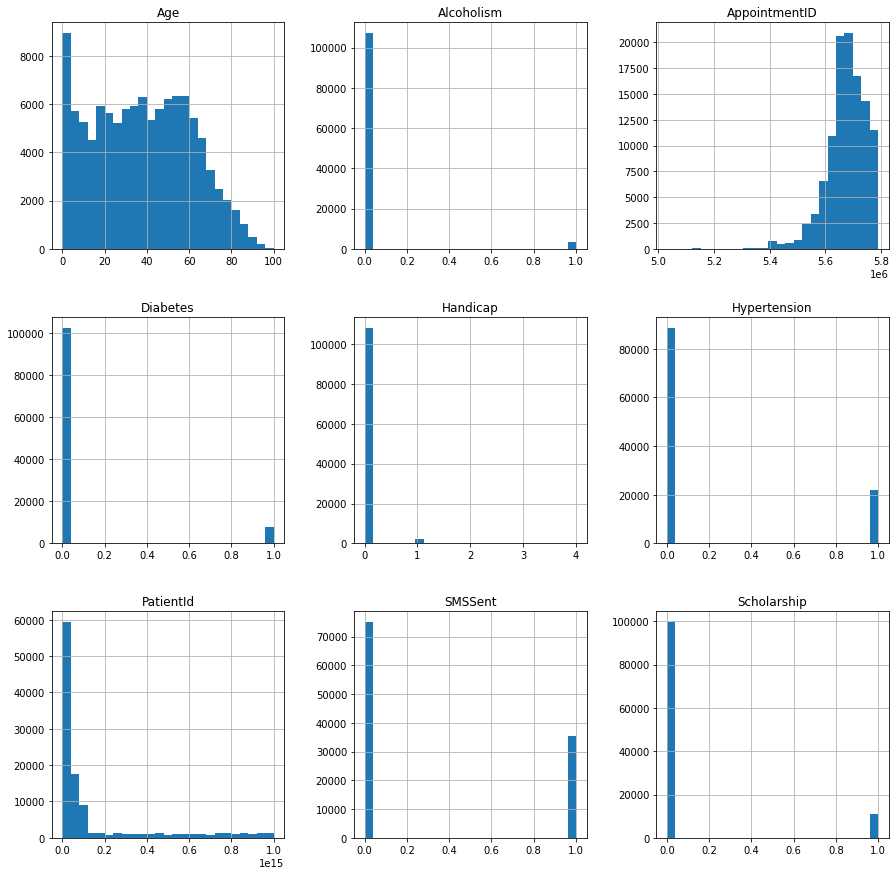

In [8]:
hist = df.hist(bins = 25, figsize = (15,15))

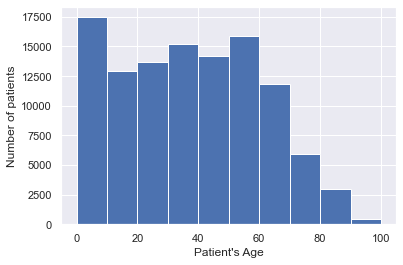

In [9]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.set()
_= plt.hist(df['Age'], bins=bin_edges)
_= plt.xlabel('Patient\'s Age')
_= plt.ylabel('Number of patients')
plt.show()

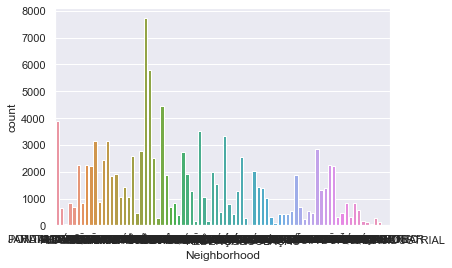

In [7]:
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()
#get counts of each variable value
df_cat.Neighborhood.value_counts()
#count plot for one variable
sns.countplot(data = df_cat, x = 'Neighborhood')

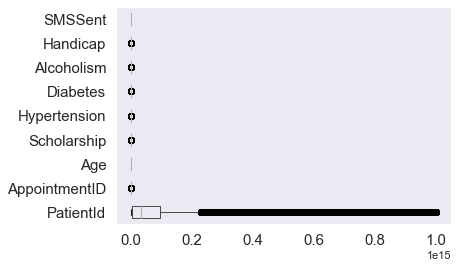

In [8]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

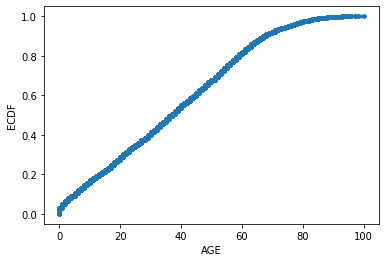

In [4]:
def ecdf(data):

    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    return x,y

b = df['Age']

xa, ye = ecdf(b)

# Generate plot
_= plt.plot(xa, ye, marker='.', linestyle='none')

# Label the axes
_= plt.ylabel('ECDF')
_= plt.xlabel('AGE')


# Display the plot
plt.show()

In [ ]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='Age', y='NoShow', data=df)

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


In [ ]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
np.percentile(df['Age'],percentiles)

In [ ]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

In [10]:
#sns.lmplot(x='Age', y='NoShow', data=df)

# Display the plot
#plt.show()


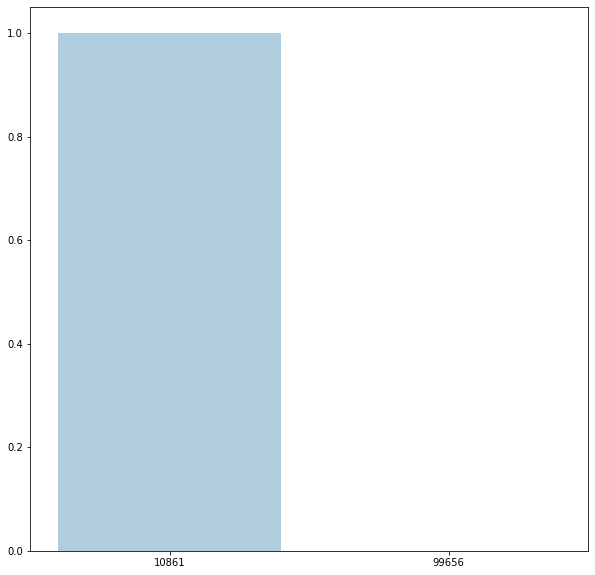

In [46]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Scholarship.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Scholarship)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

####  DATA RELATIONSHIPS

In [ ]:
#Ccorrelation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
#pair plots
g = sns.pairplot(df)

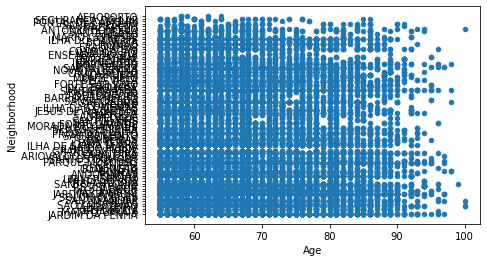

In [35]:
df[df.Age >= 55].plot.scatter('Age','Neighborhood')

### IDENTIFICATION AND CREATION OF FEATURES

In [47]:
corr = df.corr()

In [48]:
corr.round(2).style.background_gradient(cmap='coolwarm')

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent
PatientId,1.000000,0.000000,-0.000000,-0.000000,-0.010000,0.000000,0.010000,-0.010000,-0.010000
AppointmentID,0.000000,1.000000,-0.020000,0.020000,0.010000,0.020000,0.030000,0.010000,-0.260000
Age,-0.000000,-0.020000,1.000000,-0.090000,0.500000,0.290000,0.100000,0.080000,0.010000
Scholarship,-0.000000,0.020000,-0.090000,1.000000,-0.020000,-0.020000,0.040000,-0.010000,0.000000
Hypertension,-0.010000,0.010000,0.500000,-0.020000,1.000000,0.430000,0.090000,0.080000,-0.010000
Diabetes,0.000000,0.020000,0.290000,-0.020000,0.430000,1.000000,0.020000,0.060000,-0.010000
Alcoholism,0.010000,0.030000,0.100000,0.040000,0.090000,0.020000,1.000000,0.000000,-0.030000
Handicap,-0.010000,0.010000,0.080000,-0.010000,0.080000,0.060000,0.000000,1.000000,-0.020000
SMSSent,-0.010000,-0.260000,0.010000,0.000000,-0.010000,-0.010000,-0.030000,-0.020000,1.000000


k-means finds a specified number of clusters in the samples.

In [51]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df['Age','PatientId'])

KeyError: ('Age', 'PatientId')